In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline



In [2]:
electronics_data=pd.read_csv("ratings_Electronics.csv",names=['userId', 'productId','Rating','timestamp'])

In [3]:
electronics_data.head() 

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
electronics_data.shape

(7824482, 4)

In [5]:
#Taking subset of the dataset
electronics_data = electronics_data.iloc[:1048576,:]

In [6]:
electronics_data.shape

(1048576, 4)

In [7]:
# Checking the Data Type 
electronics_data.dtypes

userId        object
productId     object
Rating       float64
timestamp      int64
dtype: object

In [8]:
electronics_data.info() # there is no missing Values in this Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1048576 non-null  object 
 1   productId  1048576 non-null  object 
 2   Rating     1048576 non-null  float64
 3   timestamp  1048576 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 32.0+ MB


In [9]:
electronics_data = electronics_data.drop(columns=['timestamp'],axis=1)

In [10]:
# Five point Summary
electronics_data.describe()['Rating'].T

count    1.048576e+06
mean     3.973380e+00
std      1.399329e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [11]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(electronics_data.Rating.min()))
print('Maximum rating is: %d' %(electronics_data.Rating.max()))
# The Rating Of Movie From Range 1 .. 5

Minimum rating is: 1
Maximum rating is: 5


In [12]:
electronics_data.isnull().sum() # So there is no missing Values

userId       0
productId    0
Rating       0
dtype: int64

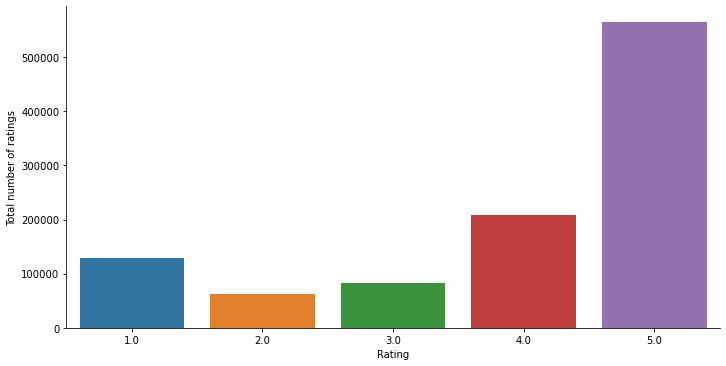

In [13]:
# Check the distribution of Rating .. || using sns.factorplot || == Bar plot
g = sns.factorplot("Rating", data=electronics_data, aspect=2.0,kind='count')
g.set_ylabels("Total number of ratings") # factorplot method is used to draw a categorical plot
# Most rated by user is 5

In [14]:
# Unique Users and Products 
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",electronics_data.shape[0])
print("Total No of Users   :", len(np.unique(electronics_data.userId)))
print("Total No of Products   :", len(np.unique(electronics_data.productId)))

Total data 
--------------------------------------------------

Total no of ratings : 1048576
Total No of Users   : 786330
Total No of Products   : 61894


# Analyzing The Rating

In [15]:
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['Rating'].count().sort_values(ascending=False) # 

In [16]:
no_of_rated_products_per_user # get unique userid and count no. of rating for each user

userId
A5JLAU2ARJ0BO     412
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    164
A6FIAB28IS79      146
AT6CZDCP4TRGA     128
                 ... 
A2DLCB8GU5E3YU      1
A2DLCBR62GHUNV      1
A2DLCKIT568DD2      1
A2DLCVS7U8OB92      1
AZZZOVIBXHGDR       1
Name: Rating, Length: 786330, dtype: int64

In [17]:
no_of_rated_products_per_user.head()

userId
A5JLAU2ARJ0BO     412
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    164
A6FIAB28IS79      146
AT6CZDCP4TRGA     128
Name: Rating, dtype: int64

In [18]:
no_of_rated_products_per_user.describe()

count    786330.000000
mean          1.333506
std           1.385612
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         412.000000
Name: Rating, dtype: float64

In [19]:
print('\n No of users whose rated more than 50 product : ' , sum(no_of_rated_products_per_user>=50))


 No of users whose rated more than 50 product :  38


<AxesSubplot:xlabel='Rating', ylabel='Density'>

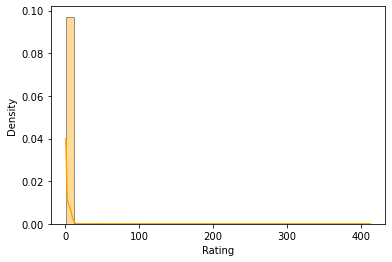

In [41]:
sns.distplot(no_of_rated_products_per_user, color="Orange", kde=True, bins=40)
# this shows that most user have rated just 1 item, with some outliers such as user rating more then 100 item

In [51]:
# Checking the number of users who give one rate only
user_with_one_rate = no_of_rated_products_per_user[no_of_rated_products_per_user==1].count()

In [52]:
user_with_one_rate

649509

In [53]:
# percentage of user who give only one time rate
ratio = user_with_one_rate/ no_of_rated_products_per_user.count()

In [54]:
ratio 

0.8260005341268933

## 82% from user have only one rate

# Popularity Based Recommendation

In [20]:
# Popularity based recommendation system works with the trend. 
# It basically uses the items which are in trend right now. For example,
# if any product which is usually bought by every new user then there are chances 
# that it may suggest that item to the user who just signed up.
# The problems with popularity based recommendation system is that the personalization is not available with this method i.e. 
# even though you know the behaviour of the user you cannot recommend items accordingly

In [21]:
df = electronics_data.groupby('userId').count() # Select from df users id and count no of ['rating'] for each user
df # Get each unique user and make some operation on it 

,productId,Rating
userId,,
A00037441I8XOQJSUWCAG,1,1
A00038802J7X43YTW44TD,2,2
A000428226SAAAIBK8I36,1,1
A0004478EF5NFPHLGCWG,1,1
A000681618A3WRMCK53V,1,1
...,...,...
AZZYXVW7BAJVD,1,1
AZZZBMD2MDOQR,1,1
AZZZEWADNFNUM,2,2


In [22]:
df = electronics_data.groupby('productId')['Rating'].count()
df # Get each unique product id and make some operation on it , ex. get Rating count for each product 

productId
0132793040       1
0321732944       1
0439886341       3
0511189877       6
0528881469      27
              ... 
B000IF4788    1001
B000IF4FVC       1
B000IF4G2A       1
B000IF4TPY     156
B000IF51UQ      66
Name: Rating, Length: 61894, dtype: int64

In [23]:
df[df>=50] # there are 3813 product have more then 50 Rating

productId
0972683275    1051
1400501466     250
1400501520      82
1400501776     139
1400532620     171
              ... 
B000IEN8QQ      64
B000IEO964      60
B000IF4788    1001
B000IF4TPY     156
B000IF51UQ      66
Name: Rating, Length: 3813, dtype: int64

In [26]:
# New Df contain products which have >=50 rating by the user 
new_df = electronics_data.groupby('productId').filter(lambda x:x['Rating'].count() >=50 )  # Great!
# select rows contain products which have more than 50 rating by the users
# .filter() return all value not just unique values

In [27]:
new_df

,userId,productId,Rating
183,A1BKC6B7YHYTVV,0972683275,4.0
184,AWVFSIB42LHKJ,0972683275,4.0
185,A36MQBNADRH8YY,0972683275,5.0
186,A3SRXMPLAEZ6DP,0972683275,4.0
187,A20XXTXWF2TCPY,0972683275,5.0
...,...,...,...
1048571,A1H16CBCNEL4G3,B000IF51UQ,5.0
1048572,A1C2OANTC49AQI,B000IF51UQ,5.0
1048573,A2JL0387FDDFS,B000IF51UQ,5.0
1048574,A2KIYE5RF0OEMY,B000IF51UQ,4.0


In [28]:
no_of_ratings_per_product = new_df.groupby(by='productId')['Rating'].count().sort_values(ascending=False)

In [29]:
no_of_ratings_per_product # all these products have more than 50 Rating 

productId
B0002L5R78    9487
B0001FTVEK    5345
B000I68BD4    4903
B000BQ7GW8    4275
B00007E7JU    3523
              ... 
B000A6JTHO      50
B0001WN0M2      50
B00020E4QO      50
B000I42XWQ      50
B00006I5JA      50
Name: Rating, Length: 3813, dtype: int64

In [30]:
# rating info for products 
new_df.describe()['Rating']

count    677947.000000
mean          4.049815
std           1.354329
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Rating, dtype: float64

In [31]:
final_df = pd.DataFrame(new_df.groupby('productId')['Rating'].mean())

In [32]:
final_df # Get each unique product with average rate of this product

,Rating
productId,
0972683275,4.470980
1400501466,3.560000
1400501520,4.243902
1400501776,3.884892
1400532620,3.684211
...,...
B000IEN8QQ,4.531250
B000IEO964,4.533333
B000IF4788,4.189810


In [33]:
final_df.columns = ['Average Rating']

In [34]:
# add new Column
final_df['Rating counts'] = pd.DataFrame(new_df.groupby('productId')['Rating'].count())

In [35]:
# Our New data frame
final_df

,Average Rating,Rating counts
productId,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171
...,...,...
B000IEN8QQ,4.531250,64
B000IEO964,4.533333,60
B000IF4788,4.189810,1001


In [36]:
# Max product have rated .. 9487 times
final_df['Rating counts'].max()

9487

<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

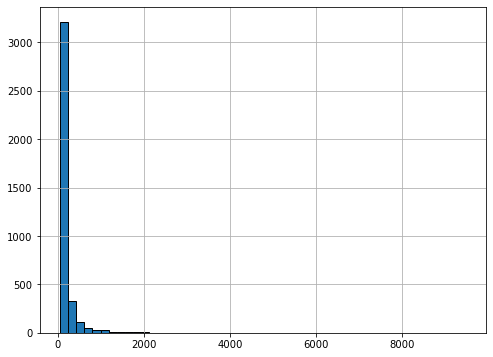

In [37]:
# Draw histogram For rating Counts .. using .hist() 
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
final_df['Rating counts'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

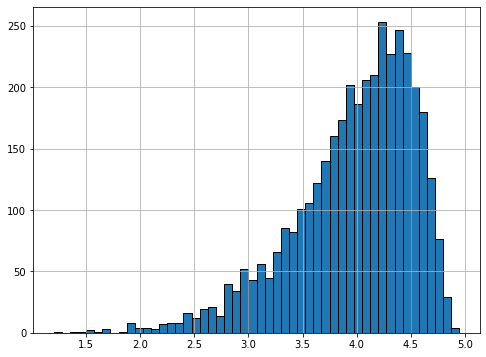

In [56]:
# draw histogram for average Distribution of products
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
final_df['Average Rating'].hist(bins=50) # .. Good, simple skewed left 
# Histogram Clarifying each rate repeated n times 

# Bayesian Average For Most Popularity

# Ra=WR+(1−W)R0

- Ra= averaged ('bayesian') rating

- R= individual rating: average rating for this item.

- R0= a priori rating: global average rating, for all items in your database.

- W= weight factor: it should tend to 0 if this items has few votes, and it should tend to 1 if it has many

In [57]:
# Ratio of count of ratings from zero to one
final_df['ratio of count rating(0,1)'] = final_df['Rating counts']/final_df['Rating counts'].max()

In [58]:
final_df

,Average Rating,Rating counts,"ratio of count rating(0,1)"
productId,,,
0972683275,4.470980,1051,0.110783
1400501466,3.560000,250,0.026352
1400501520,4.243902,82,0.008643
1400501776,3.884892,139,0.014652
1400532620,3.684211,171,0.018025
...,...,...,...
B000IEN8QQ,4.531250,64,0.006746
B000IEO964,4.533333,60,0.006324
B000IF4788,4.189810,1001,0.105513


In [59]:
# max value of ratio_of_count_rating is 1 when rating count in it's Max 9487
final_df.loc[final_df['ratio of count rating(0,1)'].idxmax()]

Average Rating                   4.448614
Rating counts                 9487.000000
ratio of count rating(0,1)       1.000000
Name: B0002L5R78, dtype: float64

In [60]:
final_df['averaged bayesian rating'] = final_df['ratio of count rating(0,1)']*final_df['Average Rating']+(1-final_df['ratio of count rating(0,1)'])*final_df['Average Rating'].max()

In [61]:
final_df

,Average Rating,Rating counts,"ratio of count rating(0,1)",averaged bayesian rating
productId,,,,
0972683275,4.470980,1051,0.110783,4.894593
1400501466,3.560000,250,0.026352,4.910809
1400501520,4.243902,82,0.008643,4.941288
1400501776,3.884892,139,0.014652,4.931801
1400532620,3.684211,171,0.018025,4.924600
...,...,...,...,...
B000IEN8QQ,4.531250,64,0.006746,4.944561
B000IEO964,4.533333,60,0.006324,4.944750
B000IF4788,4.189810,1001,0.105513,4.867436


In [62]:
popular_products_df = pd.DataFrame(final_df.sort_values('averaged bayesian rating', ascending=False)) 

# Top 5 products which Highly Highly Recommended

In [63]:
popular_products_df.head() # Top 5 products which Highly Highly Recommended

,Average Rating,Rating counts,"ratio of count rating(0,1)",averaged bayesian rating
productId,,,,
B0000DYV9H,4.947368,76,0.008011,4.947368
B000053HC5,4.945783,166,0.017498,4.947341
B00005LE76,4.879310,58,0.006114,4.946952
B000213ZFE,4.860000,50,0.005270,4.946908
B00069SORG,4.847458,59,0.006219,4.946747


<AxesSubplot:>

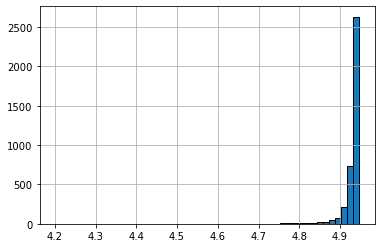

In [64]:
# Histogram for averaged bayesian rating
popular_products_df['averaged bayesian rating'].hist(bins=50)

# Collaberative filtering (Item-Item recommedation)

Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item

In [66]:
pip install scikit-surprise


  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp38-cp38-win_amd64.whl size=711543 sha256=6190e9443cb3b6db9caf97759a870867b4ec2f65734c935924b27b8406e8608d
  Stored in directory: c:\users\noweto\appdata\local\pip\cache\wheels\20\91\57\2965d4cff1b8ac7ed1b6fa25741882af3974b54a31759e10b6
Successfully built scikit-surprise


In [67]:
import sklearn 
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier

from collections import defaultdict
from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split # If you don’t want to run a full cross-validation procedure
import os




In [70]:
# For this Section we will use advantage of all Data
Data=pd.read_csv("ratings_Electronics.csv",names=['userId', 'productId','Rating','timestamp'])

In [71]:
Data = Data.drop(columns=['timestamp'],axis=1)

In [72]:
Data.shape

(7824482, 3)

In [73]:
new_data = Data.groupby('productId').filter(lambda x:x['Rating'].count()>=50)
# Contain rows-- contain products which have more than 50 rating by the users

In [74]:
new_data.shape

(5374313, 3)

In [75]:
reader = Reader(rating_scale=(1, 5))
data_reader_SVD = Dataset.load_from_df(new_df,reader)
#Splitting the dataset with 70% training and 30% testing using Surprise train_test_split
trainset_SVD, testset_SVD = train_test_split(data_reader_SVD, test_size=.30)

In [77]:
#Data Split for Memory Based Collaborative Filtering
# we were going out of memory problem so lets take first 10lac record to Collaborative filtering process.
# so splitting data in diffrent part to train them saparately 
# splitting data into 5 Equal parts of 1074862 record each
reader = Reader(rating_scale=(1, 5))
data_reader_1 = Dataset.load_from_df(new_data.iloc[:1074862,0:],reader)
data_reader_2 = Dataset.load_from_df(new_data.iloc[1074862:2149725,0:],reader)
data_reader_3 = Dataset.load_from_df(new_data.iloc[2149725:3224586,0:],reader)
data_reader_4 = Dataset.load_from_df(new_data.iloc[3224586:4299448,0:],reader)
data_reader_5 = Dataset.load_from_df(new_data.iloc[4299448:,0:],reader)

#Splitting the dataset with 70% training and 30% testing using Surprise train_test_split
trainset_1, testset_1 = train_test_split(data_reader_1, test_size=.30)
trainset_2, testset_2 = train_test_split(data_reader_2, test_size=.30)
trainset_3, testset_3 = train_test_split(data_reader_3, test_size=.30)
trainset_4, testset_4 = train_test_split(data_reader_4, test_size=.30)
trainset_5, testset_5 = train_test_split(data_reader_5, test_size=.30)

#holding all training set
trainset=[trainset_1,trainset_2,trainset_3,trainset_4,trainset_5]
#holding all testing set
testset=[testset_1,testset_2,testset_3,testset_4,testset_5]

### Memory Based Collaborative Filtering

- Collaborative filtering techniques aim to fill in the missing entries of a user-item association matrix
- We are going to use collaborative filtering approach. This is based on the idea that the best recommendations come from people who have similar tastes

In [79]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})

In [80]:
test=[]
for item in range(5):
    algo.fit(trainset[item])
    test.append(algo.test(testset[item]))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [81]:
#checking prediction
test[0][0:5]

[Prediction(uid='AZLQUF2IE6P4C', iid='B00006JN3G', r_ui=1.0, est=4.055862350362771, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A2SA6LR78V49UV', iid='B000W0OVV2', r_ui=1.0, est=3.0526315789473686, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A8CZQM9DB1NQJ', iid='B000B6KXM8', r_ui=4.0, est=3.763157894736842, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A287QX4SWTEMTR', iid='B000WL6YY8', r_ui=5.0, est=4.055862350362771, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A2H96KYWABB5MW', iid='B000CNAEEW', r_ui=5.0, est=4.055862350362771, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})]

### Model Based Collobrative Filtering

In [82]:
algo_SVD = SVD()
algo_SVD.fit(trainset_SVD)

In [83]:
predictions_SVD = algo.test(testset_SVD)

In [84]:
RMSE_SVD=accuracy.rmse(predictions_SVD, verbose=True)

RMSE: 1.3554


In [85]:
# evaluating Collobarative filtering (memory based model)
print("Item-based Model : Test Set")
RMSE = []
Total_RMSE = 0
for i in range(5):
    RMSE.append(accuracy.rmse(test[i], verbose=True))
    Total_RMSE = Total_RMSE + RMSE[i]

Item-based Model : Test Set
RMSE: 1.3363
RMSE: 1.3809
RMSE: 1.3616
RMSE: 1.3077
RMSE: 1.3175


In [86]:
#creating function to get top 5 Product Recommendation for each user.
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [87]:
top_n = get_top_n(predictions_SVD, n=5)

In [88]:
# Print the recommended items for first 50 user
count=0
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])
    if(count>49):
        break
    count=count+1

AV2INZEK3WZ5Q ['B0002SQ0A4']
A3N7OZQMWBONXS ['B00005ML7Q', 'B000H6AY6M', 'B00065ANYC', 'B000EN0K94', 'B0006N3EVS']
A1BYCYTUG2ZVEZ ['B0001F22PA', 'B000EHCUIY']
A3M6UYWCRJOGK9 ['B0000DK5LW', 'B00005T3G0']
A1RSLCKCGGZBKN ['B0000AAAPF']
A3202C86H3AD1V ['B000F4C1H6', '140053271X', 'B0002LHSFW', 'B00009WQS1', 'B000AA2RCY']
A1L0JHQ8N4MLZ ['B000H6AY6M', 'B0002K6Y9E']
A3CNVGP94SVCXY ['B000HVVHEU']
A1D4BV1R8EZ75R ['B000FB44VA']
A3MIA1LRF769D5 ['B00004T1XK']
A2HM8LP0MWYMVS ['B0002ER5B6']
AL14D9SUFVLGP ['B0002KVQBA']
A3R8XTSDWEDBNM ['B000BKJZ9Q']
A23XVBGSOPAFU0 ['B000E1CB1Q']
A2VK03JSXUTPX5 ['B000067SOL']
A3K8NHKMIA0T1U ['B000FVDD30']
A184NWR0L578SA ['B0001FTVEK']
A15Q2HRSGVP47C ['B00005LEN4']
AM8E4DWUKGLBV ['B000065BPA']
AKSD3GKHI87W6 ['B00007EDM8']
A3SEH9MH231NQQ ['B00012EYNG', 'B0001FTVEK']
A2BMA4RASETDR ['B000EOOU6M']
A2P2MKF8RBOOEA ['B00006JQ06']
A1QXRHE2514OAS ['B0000CBJ8J']
A123MJB9Y61LY3 ['B000E3XPYQ']
AGP8A2F5LP0GG ['B000089GN3']
A2TGTO1WAADQ5 ['B0002JY6TK']
A2OTP2CWBPWMD9 ['B0002L5R78']
